In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

## Inpatient

In [2]:
tr_in = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
print(tr_in.shape)
tr_in.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
tr_in['Inpatient'] = 1
tr_in['Outpatient'] = 0

In [4]:
tr_in['ClaimStartDt'] = pd.to_datetime(tr_in['ClaimStartDt'])
tr_in['ClaimEndDt'] = pd.to_datetime(tr_in['ClaimEndDt'])
tr_in['Claim_Days_Elapsed'] = (tr_in['ClaimEndDt'] - tr_in['ClaimStartDt']).dt.days

In [5]:
(tr_in['ClaimEndDt'][0] - tr_in['ClaimStartDt'][0]).days

6

In [6]:
tr_in['AdmissionDt'] = pd.to_datetime(tr_in['AdmissionDt']) 
tr_in['DischargeDt'] = pd.to_datetime(tr_in['DischargeDt'])
tr_in['Admitted_Days'] = (tr_in['DischargeDt'] - tr_in['AdmissionDt']).dt.days

In [7]:
print(len(tr_in.columns))
tr_in.columns

34


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Inpatient', 'Outpatient', 'Claim_Days_Elapsed',
       'Admitted_Days'],
      dtype='object')

In [8]:
tr_in.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,Outpatient,Claim_Days_Elapsed,Admitted_Days
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0,40474.0,40474.0,40474.000000,40474.000000
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN,1.0,0.0,5.660251,5.665168
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN,0.0,0.0,5.628873,5.638538
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.0,0.0,0.000000,0.000000
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN,1.0,0.0,2.000000,2.000000
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,1.0,0.0,4.000000,4.000000
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,1.0,0.0,7.000000,7.000000
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1.0,0.0,36.000000,35.000000


In [9]:
len(tr_in.Provider.unique())

2092

In [38]:
len(tr_in.ClaimID.unique())

40474

In [39]:
len(tr_in.AttendingPhysician.unique())

11605

In [41]:
len(tr_in.OperatingPhysician.unique())

8288

In [42]:
len(tr_in.OtherPhysician.unique())

2878

In [43]:
11605 + 8288 + 2878

22771

In [10]:
tr_in.Provider.value_counts()

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
PRV56560    248
PRV54742    231
PRV55230    225
PRV52340    224
PRV51501    223
PRV56416    214
PRV52135    210
PRV54955    205
PRV51244    200
PRV51560    200
PRV54765    196
PRV53808    195
PRV51940    193
PRV57191    185
PRV52021    181
PRV52846    175
PRV52821    173
PRV55194    169
PRV52903    167
PRV52120    165
PRV51390    164
PRV52100    164
PRV51146    162
PRV52123    162
PRV53712    161
           ... 
PRV51626      1
PRV53511      1
PRV53429      1
PRV56752      1
PRV52463      1
PRV51137      1
PRV56242      1
PRV55151      1
PRV51898      1
PRV56271      1
PRV54373      1
PRV51806      1
PRV53416      1
PRV51232      1
PRV55816      1
PRV54414      1
PRV56485      1
PRV52850      1
PRV55032      1
PRV54503      1
PRV53127      1
PRV53289      1
PRV53128      1
PRV54590      1
PRV56202      1
PRV53431      1
PRV51943      1
PRV56834      1
PRV52610      1
PRV56038      1
Name: Provider, Length: 

In [12]:
tr_in.Provider.value_counts().index[:10]

Index(['PRV52019', 'PRV55462', 'PRV54367', 'PRV53706', 'PRV55209', 'PRV56560',
       'PRV54742', 'PRV55230', 'PRV52340', 'PRV51501'],
      dtype='object')

Text(0, 0.5, 'Provider')

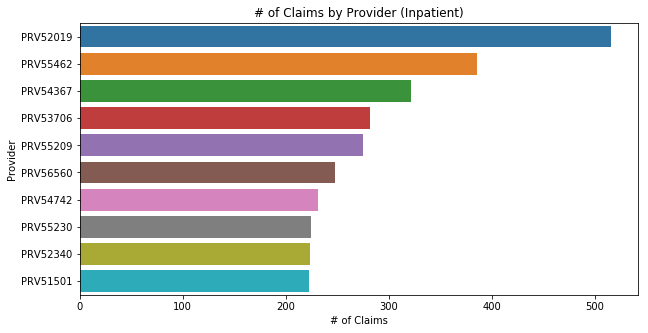

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(tr_in.Provider.value_counts().values[:10],tr_in.Provider.value_counts().index[:10] )
plt.title('# of Claims by Provider (Inpatient)')
plt.xlabel('# of Claims')
plt.ylabel('Provider')

Text(0, 0.5, '# of Claims')

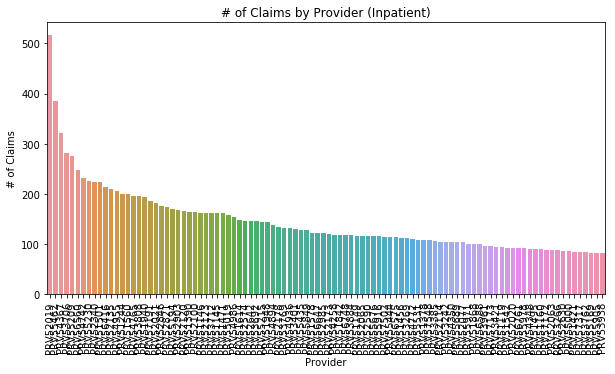

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(tr_in.Provider.value_counts().index[:100],tr_in.Provider.value_counts().values[:100] )
plt.title('# of Claims by Provider (Inpatient)')
plt.xlabel('Provider')
plt.xticks(rotation=90)
plt.ylabel('# of Claims')

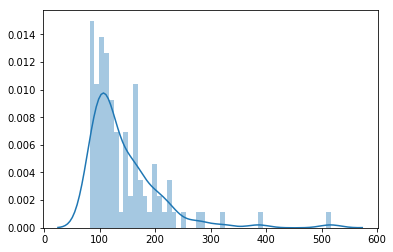

In [45]:
sns.distplot(tr_in.Provider.value_counts().values[:100], bins=50)

In [29]:
tr_in.Provider.value_counts().values.mean()

19.347036328871894

In [37]:
tr_in.Provider.value_counts().values[:100].mean()

144.12

In [19]:
top_prov = tr_in['Claim_Days_Elapsed'][tr_in['Provider']=='PRV52019']
top_prov

46        2
177       3
270       4
437       4
452       1
561       5
679       4
722       4
846       3
877       5
930       9
1119     35
1149     31
1187     16
1267      9
1636      0
1657      6
1821      7
1963      6
2092      7
2326      8
2504      3
2520      7
2551      4
2568      8
2591      3
2592      1
2608      2
2611      5
2612     13
         ..
37991     4
38096    10
38326    23
38339     1
38452     7
38541     3
38624     2
38702     3
38794     3
38808     2
38820    20
38845     6
39199     2
39363     2
39388     3
39423     2
39439     3
39480    14
39610    33
39611     2
39612    36
39692    21
39807     2
39833     3
40045     9
40163    10
40185     4
40200     3
40305     1
40422     5
Name: Claim_Days_Elapsed, Length: 516, dtype: int64

Text(0.5, 1.0, 'Top Provider vs Claim Days Elapsed')

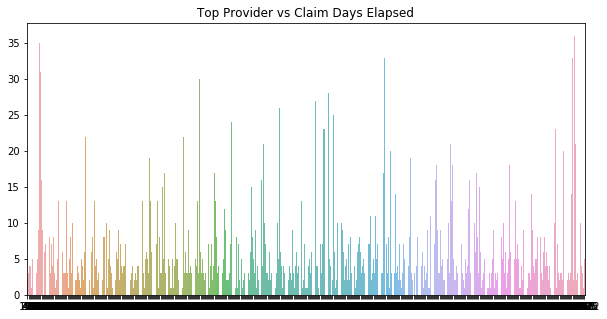

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(top_prov.index, top_prov.values, alpha=0.8)
plt.title('Top Provider vs Claim Days Elapsed')

Text(0.5, 1.0, 'Top Provider vs Claim Days Elapsed')

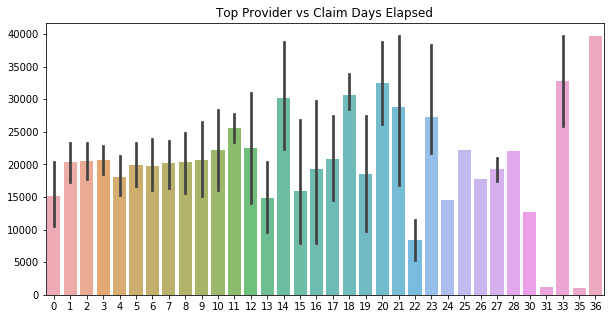

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(top_prov.values, top_prov.index, alpha=0.8)
plt.title('Top Provider vs Claim Days Elapsed')

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(top_prov.values, top_prov.index, alpha=0.8)
plt.title('Top Provider vs Claim Days Elapsed')

Text(0.5, 1.0, 'Provder vs Claim Days')

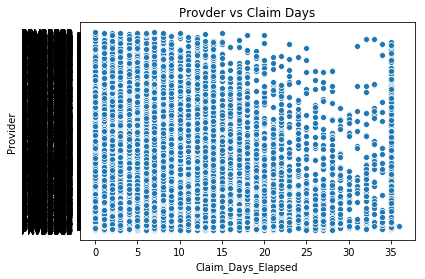

In [33]:
sns.scatterplot(x=tr_in['Claim_Days_Elapsed'], y=tr_in['Provider']).set_title("Provder vs Claim Days")

Text(0.5, 1.0, 'Admitted Days vs Claim Days')

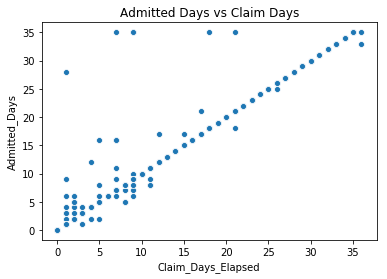

In [32]:
sns.scatterplot(x=tr_in['Claim_Days_Elapsed'], y=tr_in['Admitted_Days']).set_title('Admitted Days vs Claim Days')

In [55]:
tr_in[['Claim_Days_Elapsed', 'Admitted_Days']].head(15)

,Claim_Days_Elapsed,Admitted_Days
0,6,6
1,2,2
2,3,3
3,8,8
4,17,17
5,6,6
6,5,5
7,4,4
8,3,3
9,7,7


Text(0.5, 1.0, 'Admitted Days vs Provider')

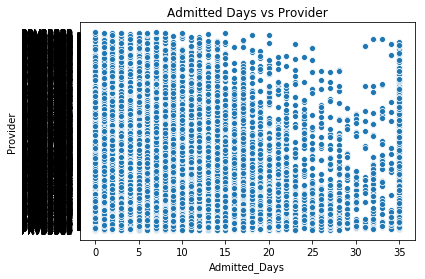

In [34]:
sns.scatterplot(x=tr_in['Admitted_Days'], y=tr_in['Provider']).set_title('Admitted Days vs Provider')

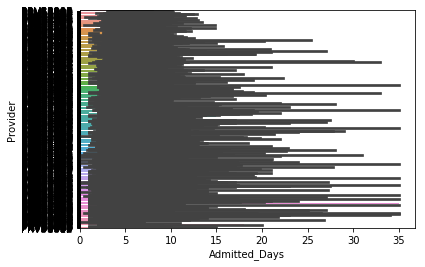

In [35]:
sns.barplot(tr_in['Admitted_Days'], tr_in['Provider'])

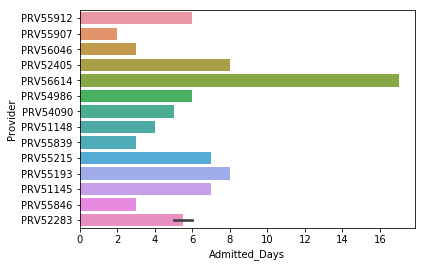

In [63]:
sns.barplot(tr_in['Admitted_Days'][:15], tr_in['Provider'][:15])

In [107]:
admit_days_mean = round(tr_in.groupby(['Provider']).Admitted_Days.mean()).sort_values(ascending=False)
admit_days_mean.head(15)

Provider
PRV57080    35.0
PRV56179    33.0
PRV53449    28.0
PRV55213    27.0
PRV53431    24.0
PRV57094    20.0
PRV55067    20.0
PRV54817    19.0
PRV52537    19.0
PRV55126    19.0
PRV53510    18.0
PRV52706    18.0
PRV55586    18.0
PRV54434    18.0
PRV56038    18.0
Name: Admitted_Days, dtype: float64

In [102]:
round(tr_in.Admitted_Days.mean())

6

Text(0, 0.5, 'Provider')

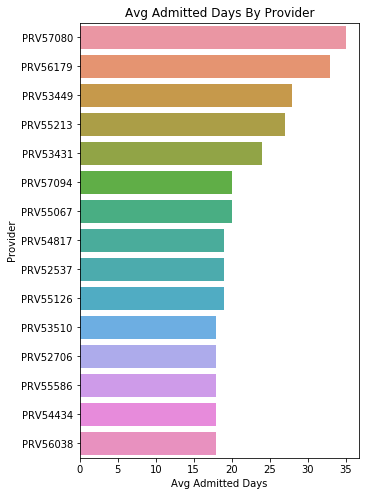

In [108]:
plt.figure(figsize=(5,8))
sns.barplot(admit_days_mean.values[:15], admit_days_mean.index[:15])
plt.title('Avg Admitted Days By Provider')
plt.xlabel('Avg Admitted Days')
plt.ylabel('Provider')

In [71]:
claim_days_mean = tr_in.groupby(['Provider']).Claim_Days_Elapsed.mean().sort_values(ascending=False)
claim_days_mean

Provider
PRV57080    35.000000
PRV56179    33.000000
PRV53449    28.000000
PRV55213    26.666667
PRV53431    24.000000
PRV55067    20.000000
PRV57094    20.000000
PRV55126    19.000000
PRV54817    19.000000
PRV52537    19.000000
PRV55586    18.500000
PRV52706    18.500000
PRV54434    18.000000
PRV56038    18.000000
PRV53510    18.000000
PRV51822    17.000000
PRV51354    17.000000
PRV56408    17.000000
PRV52518    17.000000
PRV53509    17.000000
PRV56135    17.000000
PRV52833    16.750000
PRV56658    16.000000
PRV51166    16.000000
PRV53989    16.000000
PRV56390    15.500000
PRV57399    15.000000
PRV56286    15.000000
PRV56276    15.000000
PRV56142    14.800000
              ...    
PRV52031     1.000000
PRV53329     1.000000
PRV54263     1.000000
PRV53312     1.000000
PRV54341     1.000000
PRV53764     1.000000
PRV51958     1.000000
PRV51236     1.000000
PRV56247     1.000000
PRV55151     1.000000
PRV51237     1.000000
PRV52816     1.000000
PRV54878     1.000000
PRV52610     1.000000
P

Text(0, 0.5, 'Provider')

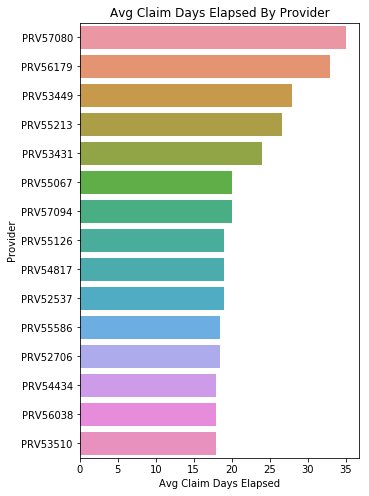

In [72]:
plt.figure(figsize=(5,8))
sns.barplot(claim_days_mean.values[:15], claim_days_mean.index[:15])
plt.title('Avg Claim Days Elapsed By Provider')
plt.xlabel('Avg Claim Days Elapsed')
plt.ylabel('Provider')

In [65]:
tr_in[['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician']].head(15)

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PHY390922,NaN,NaN
1,PHY318495,PHY318495,NaN
2,PHY372395,NaN,PHY324689
3,PHY369659,PHY392961,PHY349768
4,PHY379376,PHY398258,NaN
5,PHY402711,PHY402711,PHY402711
6,PHY412314,PHY347494,NaN
7,PHY346286,PHY405514,NaN
8,PHY385030,NaN,NaN
9,PHY355604,PHY415867,NaN


In [112]:
phys = tr_in[['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician']]

In [116]:
phys.shape

(40474, 3)

In [114]:
phys.isna().sum()

AttendingPhysician      112
OperatingPhysician    16644
OtherPhysician        35784
dtype: int64

In [134]:
#percentage of null values
phys.isna().sum()*100/len(phys)

AttendingPhysician     0.276721
OperatingPhysician    41.122696
OtherPhysician        88.412314
dtype: float64

In [73]:
len(tr_in.BeneID.unique())

31289

In [26]:
tr_in[["BeneID", "ClaimID", "Provider"]]

,BeneID,ClaimID,Provider
0,BENE11001,CLM46614,PRV55912
1,BENE11001,CLM66048,PRV55907
2,BENE11001,CLM68358,PRV56046
3,BENE11011,CLM38412,PRV52405
4,BENE11014,CLM63689,PRV56614
5,BENE11017,CLM70950,PRV54986
6,BENE11018,CLM32075,PRV54090
7,BENE11028,CLM62376,PRV51148
8,BENE11031,CLM62784,PRV55839
9,BENE11034,CLM31519,PRV55215


In [78]:
tr_in[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']]

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
1,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
3,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN
4,042,3051,34400,5856,42732,486,5119,29620,20300,NaN
5,1745,V4571,78702,28521,7019,1963,2948,25000,25002,NaN
6,1536,73300,7230,3659,2859,4019,2948,2809,56210,NaN
7,56212,25000,30000,73300,2766,53081,2851,4439,41401,NaN
8,42823,4280,6822,40390,43811,78322,NaN,NaN,NaN,NaN
9,41041,3669,V851,25062,V074,2766,4019,4111,4589,NaN


In [84]:
tr_in['ClmDiagnosisCode_1'].nunique()

2254

In [94]:
tr_in['ClmDiagnosisCode_1'].isna().count()

40474

In [85]:
tr_in['ClmDiagnosisCode_2'].nunique()

2439

In [86]:
tr_in['ClmDiagnosisCode_3'].nunique()

2427

#### Multiple claims

In [75]:
multc = tr_in.groupby('BeneID')['ClaimID'].nunique().sort_values(ascending=False)
multc.head(15)

BeneID
BENE134170    8
BENE64791     7
BENE117116    7
BENE121796    7
BENE119457    7
BENE62091     7
BENE56800     6
BENE87221     6
BENE126421    6
BENE117983    6
BENE31905     6
BENE28270     6
BENE124069    6
BENE49263     6
BENE130582    6
Name: ClaimID, dtype: int64

In [77]:
multc

31289

Text(0, 0.5, 'BeneID')

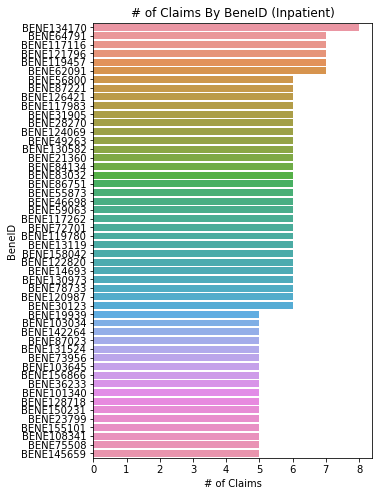

In [166]:
plt.figure(figsize=(5,8))
sns.barplot(multc.values[:50], multc.index[:50])
plt.title('# of Claims By BeneID (Inpatient)')
plt.xlabel('# of Claims')
plt.ylabel('BeneID')

In [ ]:
sns.scatterplot(x=multc.index, y=multc.values)

In [132]:
#percentage of null values
tr_in.isna().sum()*100/len(tr_in)

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

## Outpatient

In [118]:
tr_out = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
print(tr_out.shape)
tr_out.head()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [119]:
tr_out.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [120]:
tr_out['Inpatient'] = 0
tr_out['Outpatient'] = 1
tr_out['ClaimStartDt'] = pd.to_datetime(tr_out['ClaimStartDt'])
tr_out['ClaimEndDt'] = pd.to_datetime(tr_out['ClaimEndDt'])
tr_out['Claim_Days_Elapsed'] = (tr_out['ClaimEndDt'] - tr_out['ClaimStartDt']).dt.days

In [121]:
print(len(tr_out.columns))
tr_out.columns

30


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Inpatient', 'Outpatient',
       'Claim_Days_Elapsed'],
      dtype='object')

In [165]:
len(tr_out.Provider.unique())

5012

In [122]:
phys_o = tr_out[['AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician']]
print(phys_o.shape)
phys_o.isna().sum()

(517737, 3)


AttendingPhysician      1396
OperatingPhysician    427120
OtherPhysician        322691
dtype: int64

In [123]:
phys_o.head()

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PHY326117,NaN,NaN
1,PHY362868,NaN,NaN
2,PHY328821,NaN,NaN
3,PHY334319,NaN,NaN
4,PHY403831,NaN,NaN


In [131]:
#percentage of null values
tr_out.isna().sum()*100/len(tr_out)

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
I

Text(0, 0.5, 'Provider')

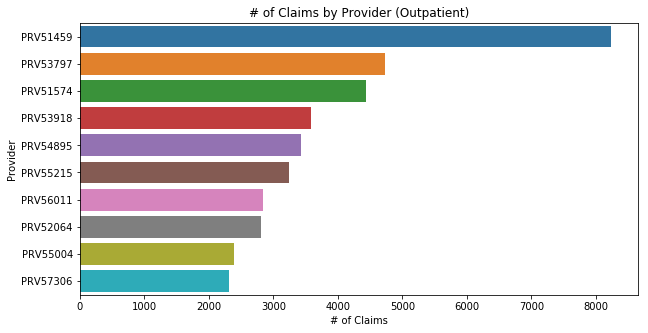

In [135]:
plt.figure(figsize=(10,5))
sns.barplot(tr_out.Provider.value_counts().values[:10],tr_out.Provider.value_counts().index[:10] )
plt.title('# of Claims by Provider (Outpatient)')
plt.xlabel('# of Claims')
plt.ylabel('Provider')

In [149]:
tr_out.Provider.value_counts()[:10].mean()

3804.4

Text(0, 0.5, '# of Claims')

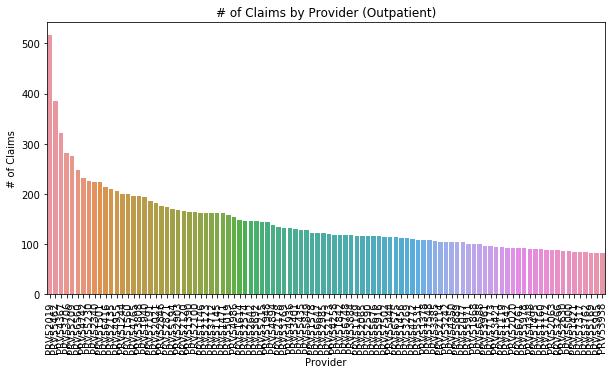

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(tr_in.Provider.value_counts().index[:100],tr_in.Provider.value_counts().values[:100] )
plt.title('# of Claims by Provider (Outpatient)')
plt.xlabel('Provider')
plt.xticks(rotation=90)
plt.ylabel('# of Claims')


In [150]:
tr_out.Provider.value_counts()[:100].mean()

1556.26

In [140]:
mult_cl_out = tr_out.groupby('BeneID')['ClaimID'].nunique().sort_values(ascending=False)
mult_cl_out.head(15)

BeneID
BENE42721     29
BENE118316    29
BENE59303     27
BENE63544     27
BENE143400    27
BENE63504     27
BENE44241     26
BENE36330     26
BENE40202     25
BENE111593    25
BENE87248     25
BENE158374    25
BENE28733     24
BENE81944     24
BENE17000     24
Name: ClaimID, dtype: int64

Text(0, 0.5, 'BeneID')

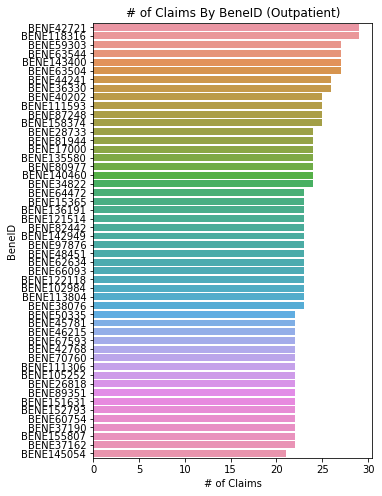

In [145]:
plt.figure(figsize=(5,8))
sns.barplot(mult_cl_out.values[:50], mult_cl_out.index[:50])
plt.title('# of Claims By BeneID (Outpatient)')
plt.xlabel('# of Claims')
plt.ylabel('BeneID')

In [8]:
tr_ben = pd.read_csv('tr_ben.csv')

In [52]:
#see which features these DFs have in common
set(tr_in.columns).intersection(set(tr_out.columns))

{'AttendingPhysician',
 'BeneID',
 'ClaimEndDt',
 'ClaimID',
 'ClaimStartDt',
 'Claim_Days_Elapsed',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'Inpatient',
 'InscClaimAmtReimbursed',
 'OperatingPhysician',
 'OtherPhysician',
 'Outpatient',
 'Provider'}

In [124]:
print(len(tr_in.columns))
tr_in.columns

34


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Inpatient', 'Outpatient', 'Claim_Days_Elapsed',
       'Admitted_Days'],
      dtype='object')

In [147]:
print(len(tr_out.columns))
tr_out.columns

30


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Inpatient', 'Outpatient',
       'Claim_Days_Elapsed'],
      dtype='object')

In [146]:
print("Inpatient Shape:", tr_in.shape)
print("Outpatient Shape:", tr_out.shape)

Inpatient Shape: (40474, 34)
Outpatient Shape: (517737, 30)


In [ ]:
# not found in outpatient: 'AdmissionDt', 'DischargeDt', 'Admitted_Days', 'DiagnosisGroupCode'

# Merge or Concat

In [152]:
tr_inout = pd.concat([tr_in, tr_out], join="outer", axis=0)
print(tr_inout.shape)
tr_inout.columns

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(558211, 34)


Index(['AdmissionDt', 'Admitted_Days', 'AttendingPhysician', 'BeneID',
       'ClaimEndDt', 'ClaimID', 'ClaimStartDt', 'Claim_Days_Elapsed',
       'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'DischargeDt', 'Inpatient',
       'InscClaimAmtReimbursed', 'OperatingPhysician', 'OtherPhysician',
       'Outpatient', 'Provider'],
      dtype='object')

In [156]:
tr_inout['Inpatient'].value_counts()

0    517737
1     40474
Name: Inpatient, dtype: int64

In [157]:
tr_inout['Outpatient'].value_counts()

1    517737
0     40474
Name: Outpatient, dtype: int64

In [162]:
tr_inout[:1].columns

Index(['AdmissionDt', 'Admitted_Days', 'AttendingPhysician', 'BeneID',
       'ClaimEndDt', 'ClaimID', 'ClaimStartDt', 'Claim_Days_Elapsed',
       'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'DischargeDt', 'Inpatient',
       'InscClaimAmtReimbursed', 'OperatingPhysician', 'OtherPhysician',
       'Outpatient', 'Provider'],
      dtype='object')